# EUR USD Pivot Strategy Backtest 
#
### by Wolfrank Guzman 
@guzmanwolfrank : Github 


In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import quantstats as qs 


plt.style.use('bmh')  # Example: Use a darker theme


In [2]:
# Define the strategy
def pivot_point_bounce_strategy(data):
    # Calculate daily pivot points
    data['PP'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['R1'] = 2 * data['PP'] - data['Low']
    data['S1'] = 2 * data['PP'] - data['High']

    # Generate buy signals
    data['Signal'] = 0
    data.loc[(data['Close'] < data['PP']) & (data['Close'].shift(1) >= data['PP']), 'Signal'] = 1

    # Calculate hypothetical returns (assuming fixed position size)
    data['Returns'] = data['Close'].pct_change() * data['Signal'].shift(1)

    return data.round(4)

# Fetch ticker  data
ticker = "EURUSD=X"


data = yf.download(ticker, period="5y")

# Apply the strategy
data = pivot_point_bounce_strategy(data.copy())
df = data    

# Print key performance metrics
print("Hypothetical Strategy Performance:")
print("Total Return:", (data['Returns'] + 1).prod() - 1)
print("Max Drawdown:", (data['Returns'].cumsum() + 1).rolling(window=252).min() - 1)

[*********************100%***********************]  1 of 1 completed
Hypothetical Strategy Performance:
Total Return: 0.7228838316399568
Max Drawdown: Date
2019-01-30       NaN
2019-01-31       NaN
2019-02-01       NaN
2019-02-04       NaN
2019-02-05       NaN
               ...  
2024-01-24    0.4265
2024-01-25    0.4265
2024-01-26    0.4265
2024-01-29    0.4265
2024-01-30    0.4265
Name: Returns, Length: 1304, dtype: float64


In [3]:
# Add Columns for Balance, Profit, Unit Size, Delta, Change, Range, Shares 

# start_balance = 10,000
start_balance = 10000

# Profit = df['Returns']*1000 
df ['Profit'] = df['Returns'].round(2)*10000

# cum_profit = df['Profit'].cumsum()
cum_profit = df['Profit'].cumsum()

# Balance = cum_profit + start_balance
df['Balance'] = df['Profit'].cumsum() + 10000
# Range = df['high'] - df['low']
# Change = df['close'] - df['open']
# Shares = 1000 

display (df)

,Open,High,Low,Close,Adj Close,Volume,PP,R1,S1,Signal,Returns,Profit,Balance
Date,,,,,,,,,,,,,
2019-01-30,1.1435,1.1450,1.1409,1.1435,1.1435,0,1.1431,1.1454,1.1413,0,NaN,NaN,NaN
2019-01-31,1.1486,1.1514,1.1451,1.1488,1.1488,0,1.1484,1.1517,1.1454,0,0.0000,0.0,10000.0
2019-02-01,1.1451,1.1488,1.1435,1.1450,1.1450,0,1.1458,1.1480,1.1427,1,-0.0000,-0.0,10000.0
2019-02-04,1.1457,1.1463,1.1425,1.1455,1.1455,0,1.1448,1.1470,1.1433,0,0.0005,0.0,10000.0
2019-02-05,1.1436,1.1443,1.1403,1.1436,1.1436,0,1.1428,1.1452,1.1412,0,-0.0000,-0.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,1.0858,1.0931,1.0852,1.0858,1.0858,0,1.0880,1.0909,1.0829,0,-0.0000,-0.0,13400.0
2024-01-25,1.0882,1.0900,1.0826,1.0882,1.0882,0,1.0869,1.0913,1.0838,0,0.0000,0.0,13400.0
2024-01-26,1.0847,1.0883,1.0813,1.0847,1.0847,0,1.0848,1.0882,1.0813,1,-0.0000,-0.0,13400.0


In [4]:
# Filter rows where 'Returns' is not equal to zero
df_filtered = df[df['Profit'] != 0]


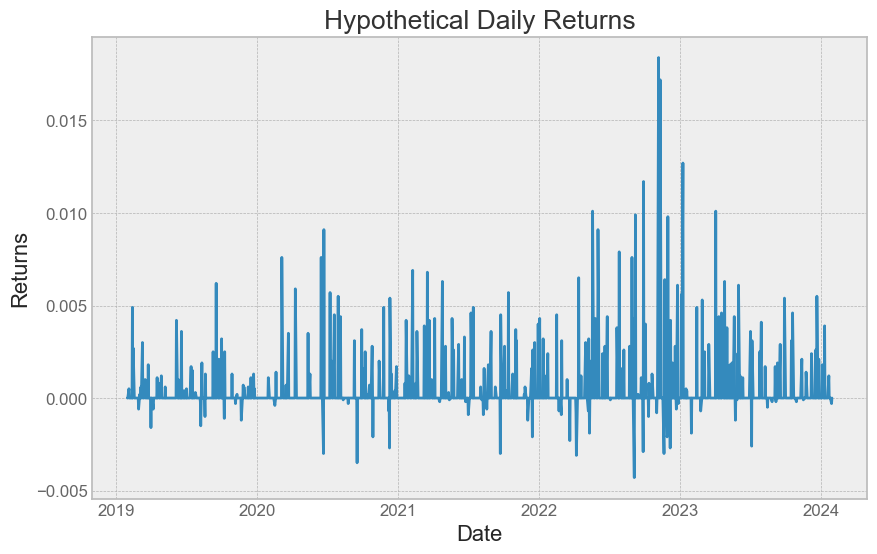

In [5]:

# Create the line chart
sns.lineplot(x="Date", y="Returns", data=df)

# Customize the plot
plt.title("Hypothetical Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid(True)

# Show the plot
plt.show()

[*********************100%***********************]  1 of 1 completed


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-02-04   2019-02-04
End Period                 2024-01-30   2024-01-30
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       20.0%

Cumulative Return          -5.32%       72.29%
CAGR﹪                     -0.75%       7.82%

Sharpe                     -0.11        4.12
Prob. Sharpe Ratio         40.11%       100.0%
Smart Sharpe               -0.1         3.67
Sortino                    -0.16        19.78
Smart Sortino              -0.14        17.63
Sortino/√2                 -0.11        13.99
Smart Sortino/√2           -0.1         12.46
Omega                      8.93         8.93

Max Drawdown               -22.24%      -0.62%
Longest DD Days            1118         33
Volatility (ann.)          7.23%        2.56%
R^2                        0.14         0.14
Information Ratio          0.11         0.11
Calmar              

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-03-22,2022-04-08,2022-04-13,23,-0.618856,-0.309816
2,2022-09-05,2022-09-05,2022-09-07,3,-0.430000,-0.001849
3,2022-11-29,2022-11-30,2022-11-30,2,-0.409580,-0.210000
4,2020-12-08,2020-12-10,2020-12-10,3,-0.359743,-0.089986
5,2020-09-17,2020-09-17,2020-09-28,12,-0.350000,NaN


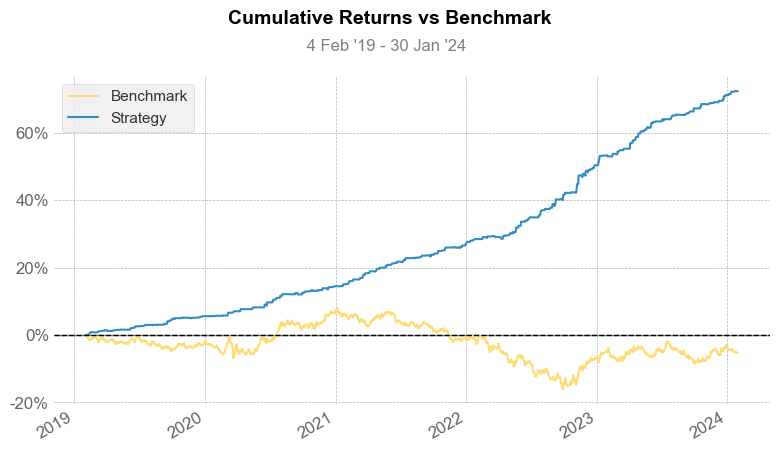

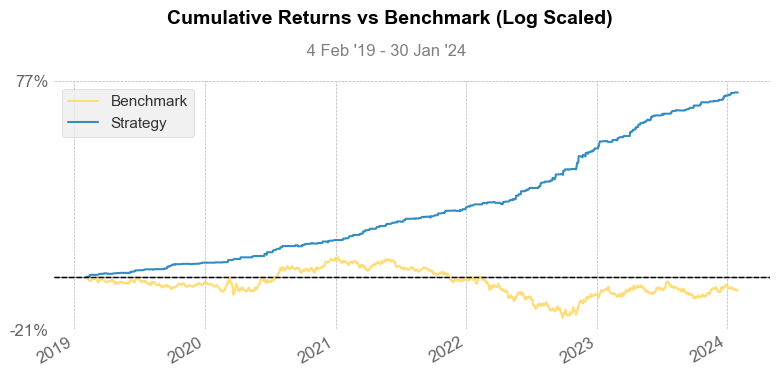

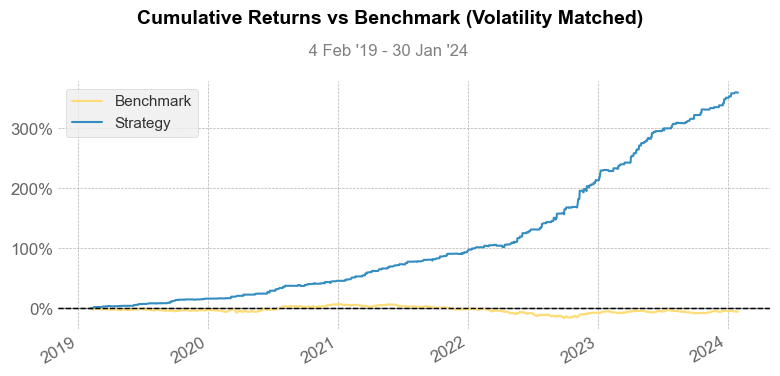

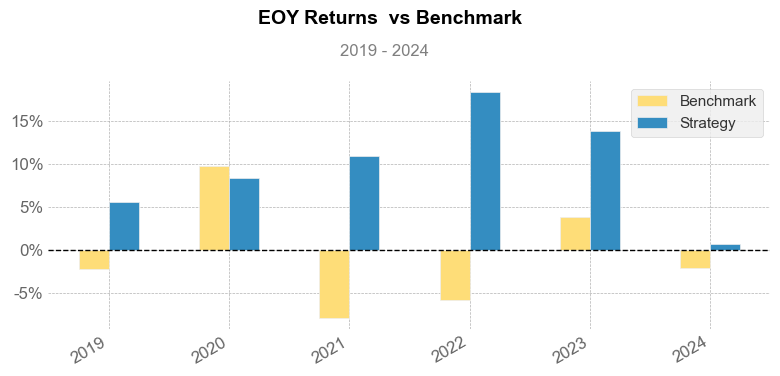

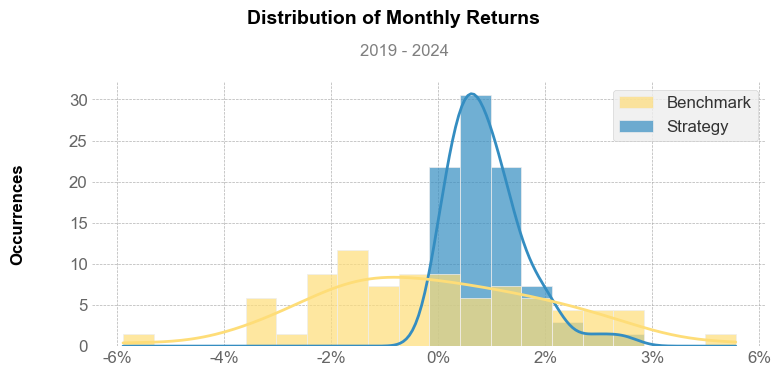

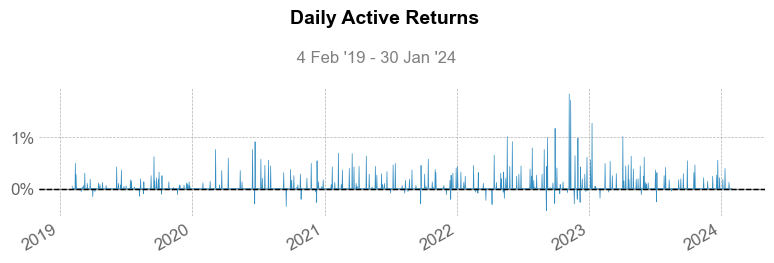

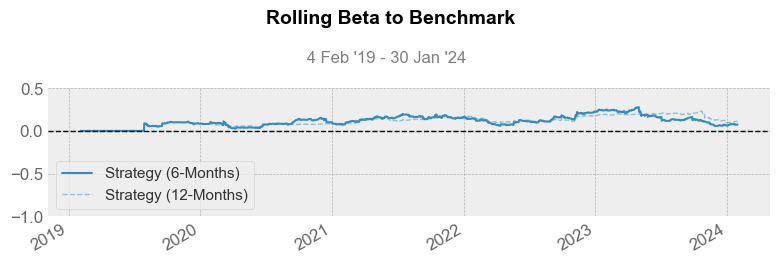

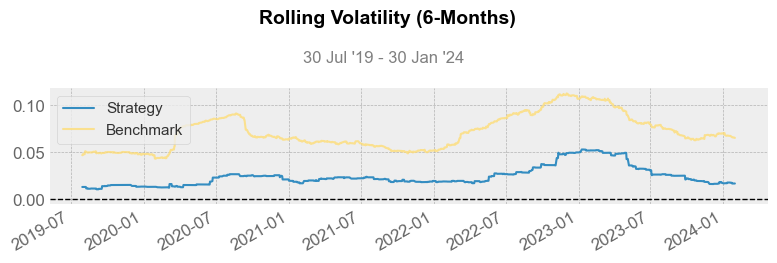

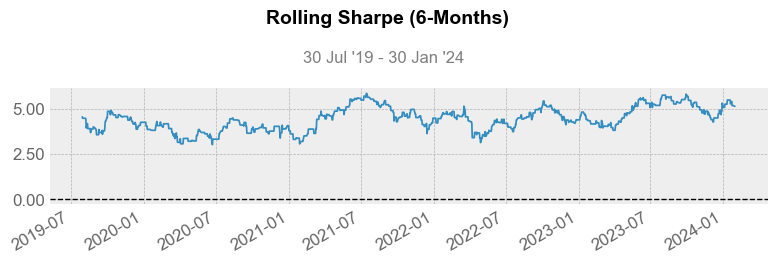

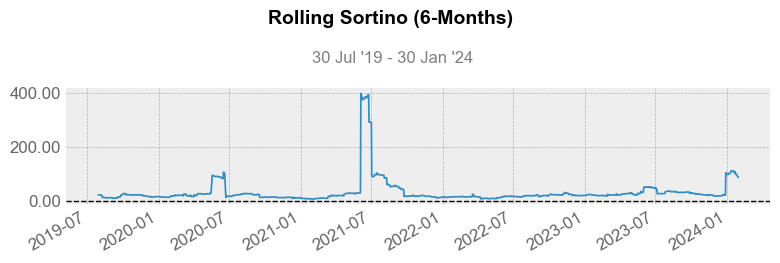

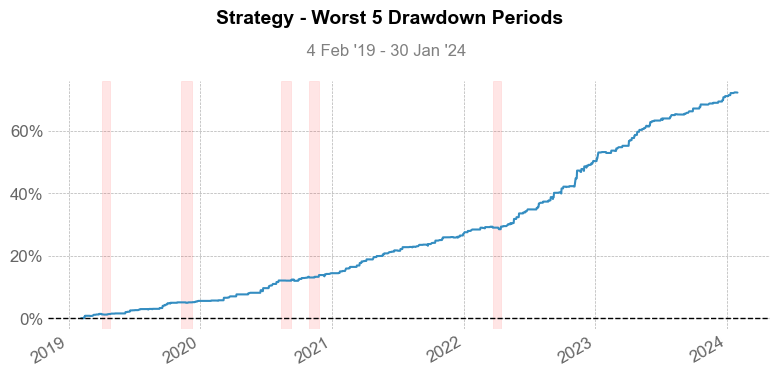

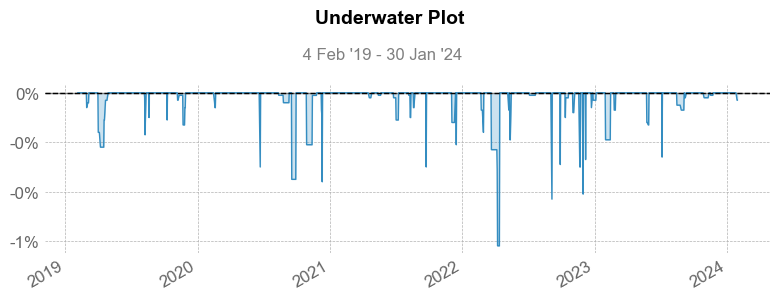

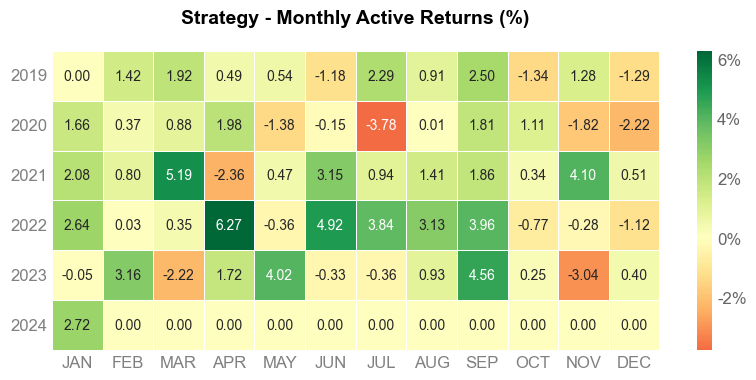

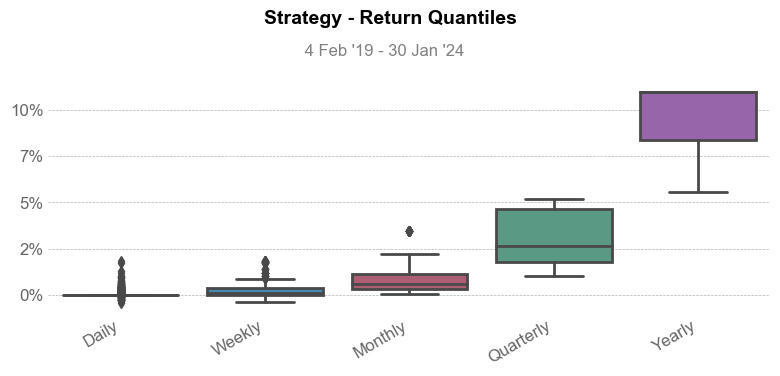

In [6]:
# Load returns, without having to convert to a series 
returns_series = df['Returns']

# Optional benchmark 
benchmark = qs.utils.download_returns("EURUSD=X")

# Full Returns and Benchmark Tearsheet 
qs.reports.full(returns_series, benchmark)

# Html Tearsheet
qs.reports.html(returns_series, benchmark=benchmark)